In [ ]:
from google.colab import files
files.upload()

### Install Packages

In [ ]:
!apt-get install default-jre
!java -version
!pip install h2o

### Import Libraries & Initialize H2O

In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML,get_leaderboard
import warnings
warnings.filterwarnings('ignore')

h2o.init()

### Data Preperation
* Import Data
* Convert Data to H2O frame
* Split Data to Train & Test  

In [20]:
df=pd.read_csv('/content/tracks.csv')
x=list(df.columns)
y='valence'
x.remove(y)
df=h2o.H2OFrame(df)
train,test=df.split_frame([0.7], seed=42)
print("train:%d test:%d" % (train.nrows, test.nrows))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
train:191722 test:81878


### AutoML Implementation

In [37]:
#prerequisites
aml=H2OAutoML(sort_metric='MSE',max_runtime_secs=60*60,max_runtime_secs_per_model=10*60,
              exclude_algos=['StackedEnsemble'],stopping_metric='MAE',stopping_tolerance=5e-3,seed=42)

#fit models
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_5_20241011_124634


Model Summary: 
    number_of_trees
--  -----------------
    89

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.0001284868849925897
RMSE: 0.011335205555815462
MAE: 0.0026045122874260827
RMSLE: 0.007945876397051204
Mean Residual Deviance: 0.0001284868849925897

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.0008718165625753009
RMSE: 0.029526539969581617
MAE: 0.005817935547311027
RMSLE: 0.02016466354074659
Mean Residual Deviance: 0.0008718165625753009

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0            nan           nan           nan           nan           nan
loglikelihood           nan          0            nan           nan           nan           nan           nan
mae                     0.00581793   0.000507655  0.00612898    0.00562752    0.00621537    0.00610921    0.00500859
mean_residual_deviance  0.000871817  7.23874e-05  0.000930467   0.000776412   0.000940265   0.000896158   0.000815781
mse                     0.000871817  7.23874e-05  0.000930467   0.000776412   0.000940265   0.000896158   0.000815781
r2                      0.981022     0.00163615   0.979772      0.983257      0.979512      0.980354      0.982215
residual_deviance       0.000871817  7.23874e-05  0.000930467   0.000776412   0.000940265   0.000896158   0.000815781
rmse                    0.0295059    0.00123565   0.0305036     0.0278642     0.0306638     0.0299359     0.0285619
rmsle                   0.0201512    0.000823697  0.0207726     0.019109      0.0209163     0.0205253     0.0194327

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2024-10-11 12:55:03  8 min 28.340 sec  0                  0.214366         0.178066        0.0459528
    2024-10-11 12:55:05  8 min 30.894 sec  5                  0.0633951        0.0467176       0.00401894
    2024-10-11 12:55:09  8 min 34.884 sec  10                 0.0352548        0.0182153       0.0012429
    2024-10-11 12:55:11  8 min 37.148 sec  15                 0.0275211        0.0110084       0.000757413
    2024-10-11 12:55:14  8 min 39.490 sec  20                 0.0250253        0.00908248      0.000626267
    2024-10-11 12:55:16  8 min 42.012 sec  25                 0.0228602        0.00772128      0.000522588
    2024-10-11 12:55:20  8 min 45.646 sec  30                 0.021459         0.00692317      0.000460488
    2024-10-11 12:55:24  8 min 49.354 sec  35                 0.0202235        0.00621688      0.000408989
    2024-10-11 12:55:27  8 min 52.317 sec  40                 0.0190368        0.0055888       0.0003624
    2024-10-11 12:55:30  8 min 55.437 sec  45                 0.0179283        0.00512356      0.000321424
    2024-10-11 12:55:34  8 min 59.978 sec  50                 0.0171335        0.00476148      0.000293555
    2024-10-11 12:55:38  9 min  4.197 sec  55                 0.0163721        0.00442774      0.000268047
    2024-10-11 12:55:43  9 min  9.088 sec  60                 0.015545         0.00408905      0.000241648
    2024-10-11 12:55:49  9 min 14.476 sec  65                 0.0145003        0.00370181      0.000210258
    2024-10-11 12:55:55  9 min 21.224 sec  70                 0.0137569        0.00344173      0.000189253
    2024-10-11 12:56:00  9 min 25.402 sec  75                 0.0132376        0.00324017      0.000175234
    2024-10-11 12:56:06  9 min 31.619 sec  80                 0.0125438        0.00300105      0.000157346
    2024-10-1

### Results of Models

In [54]:
models_id=list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
models_id

['XGBoost_1_AutoML_5_20241011_124634',
 'DRF_1_AutoML_5_20241011_124634',
 'GBM_4_AutoML_5_20241011_124634',
 'XGBoost_2_AutoML_5_20241011_124634',
 'XRT_1_AutoML_5_20241011_124634',
 'GBM_1_AutoML_5_20241011_124634',
 'GBM_3_AutoML_5_20241011_124634',
 'GBM_2_AutoML_5_20241011_124634',
 'XGBoost_3_AutoML_5_20241011_124634',
 'GBM_5_AutoML_5_20241011_124634',
 'DeepLearning_1_AutoML_5_20241011_124634',
 'GLM_1_AutoML_5_20241011_124634']

In [39]:
pandas_df = aml.leaderboard['model_id'].as_data_frame(use_multi_thread=True)
pandas_df

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,model_id
0,XGBoost_1_AutoML_5_20241011_124634
1,DRF_1_AutoML_5_20241011_124634
2,GBM_4_AutoML_5_20241011_124634
3,XGBoost_2_AutoML_5_20241011_124634
4,XRT_1_AutoML_5_20241011_124634
5,GBM_1_AutoML_5_20241011_124634
6,GBM_3_AutoML_5_20241011_124634
7,GBM_2_AutoML_5_20241011_124634
8,XGBoost_3_AutoML_5_20241011_124634
9,GBM_5_AutoML_5_20241011_124634


In [40]:
models=aml.leaderboard
models.head()

model_id,mse,rmse,mae,rmsle,mean_residual_deviance
XGBoost_1_AutoML_5_20241011_124634,0.000871817,0.0295265,0.00581794,0.0201647,0.000871817
DRF_1_AutoML_5_20241011_124634,0.000968684,0.0311237,0.0104066,0.021421,0.000968684
GBM_4_AutoML_5_20241011_124634,0.00119487,0.0345668,0.0109578,0.0237121,0.00119487
XGBoost_2_AutoML_5_20241011_124634,0.00128541,0.0358526,0.0117165,0.0245182,0.00128541
XRT_1_AutoML_5_20241011_124634,0.00138677,0.0372394,0.0141582,0.0255374,0.00138677
GBM_1_AutoML_5_20241011_124634,0.00178767,0.0422808,0.0151934,0.0289707,0.00178767
GBM_3_AutoML_5_20241011_124634,0.0021744,0.0466305,0.0210733,0.0319442,0.0021744
GBM_2_AutoML_5_20241011_124634,0.0032937,0.0573907,0.0300452,0.0391773,0.0032937
XGBoost_3_AutoML_5_20241011_124634,0.0169626,0.13024,0.0992745,0.0880098,0.0169626
GBM_5_AutoML_5_20241011_124634,0.0221786,0.148925,0.119126,0.100893,0.0221786


### Details of Models

In [41]:
models_details = get_leaderboard(aml, extra_columns='ALL')
models_details.head(models_details.nrows)

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_5_20241011_124634,0.000871817,0.0295265,0.00581794,0.0201647,0.000871817,77823,0.018451,XGBoost
DRF_1_AutoML_5_20241011_124634,0.000968684,0.0311237,0.0104066,0.021421,0.000968684,31684,0.028392,DRF
GBM_4_AutoML_5_20241011_124634,0.00119487,0.0345668,0.0109578,0.0237121,0.00119487,84371,0.10107,GBM
XGBoost_2_AutoML_5_20241011_124634,0.00128541,0.0358526,0.0117165,0.0245182,0.00128541,58530,0.011417,XGBoost
XRT_1_AutoML_5_20241011_124634,0.00138677,0.0372394,0.0141582,0.0255374,0.00138677,2977,0.002314,DRF
GBM_1_AutoML_5_20241011_124634,0.00178767,0.0422808,0.0151934,0.0289707,0.00178767,93997,0.104826,GBM
GBM_3_AutoML_5_20241011_124634,0.0021744,0.0466305,0.0210733,0.0319442,0.0021744,89496,0.108512,GBM
GBM_2_AutoML_5_20241011_124634,0.0032937,0.0573907,0.0300452,0.0391773,0.0032937,90028,0.10357,GBM
XGBoost_3_AutoML_5_20241011_124634,0.0169626,0.13024,0.0992745,0.0880098,0.0169626,5832,0.002263,XGBoost
GBM_5_AutoML_5_20241011_124634,0.0221786,0.148925,0.119126,0.100893,0.0221786,4175,0.009478,GBM


Evaluation Metrics of Leader Model

In [45]:
mod=aml.leader

print('\033[1mTrain Performance:\033[0m\n',mod.model_performance(train),end='\n\n')
print("\033[1mTest Performance:\033[0m\n",mod.model_performance(test))

Train Performance:
 ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.0001284868849925897
RMSE: 0.011335205555815462
MAE: 0.0026045122874260827
RMSLE: 0.007945876397051204
Mean Residual Deviance: 0.0001284868849925897

Test Performance:
 ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.0007827031915815165
RMSE: 0.027976833122809245
MAE: 0.005164739920417454
RMSLE: 0.019237768573252694
Mean Residual Deviance: 0.0007827031915815165


Variable Importance for Leader Model

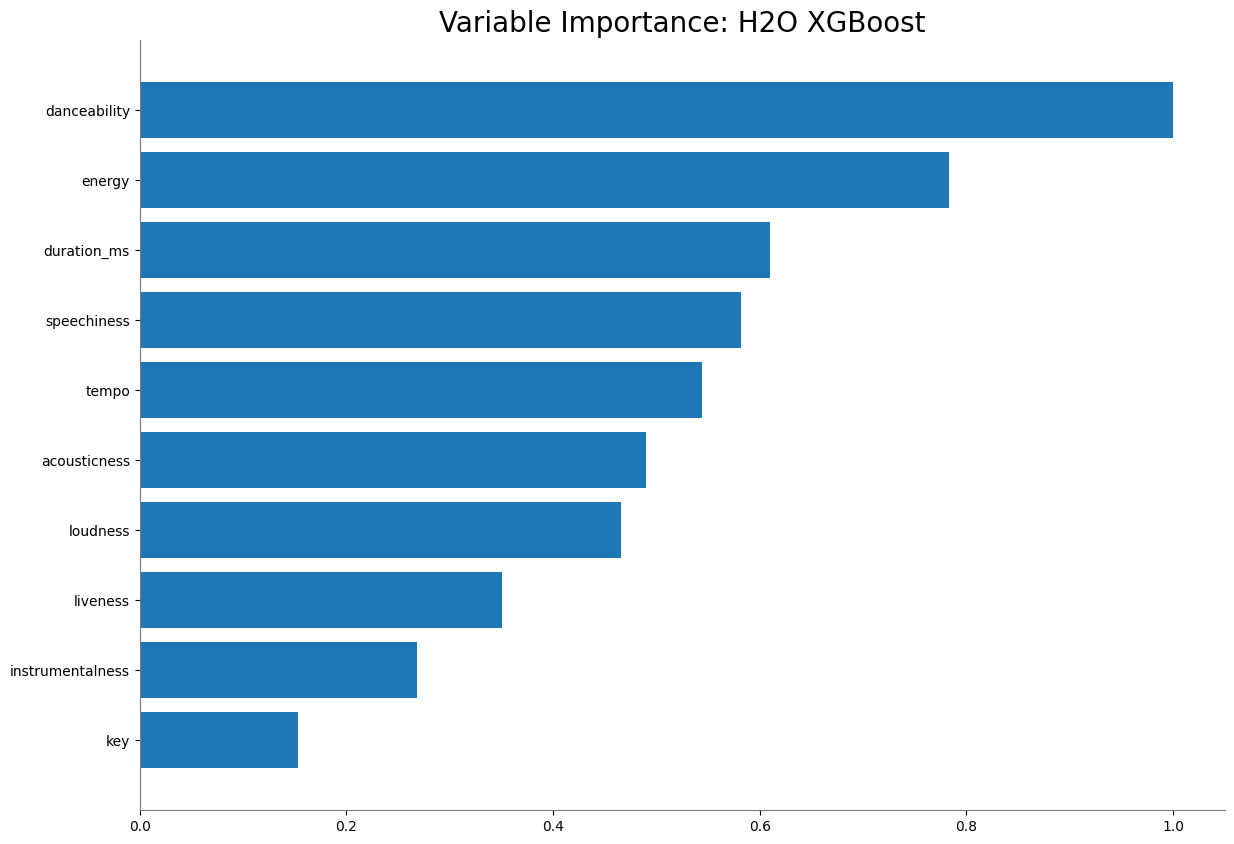

<Figure size 640x480 with 0 Axes>

In [46]:
mod.varimp_plot()

Prediction

In [47]:
pred =mod.predict(test)
pred = pred.cbind(test['valence'])
pred.head()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict,valence
0.448059,0.447
0.632037,0.632
0.501037,0.501
0.730946,0.732
0.613249,0.613
0.511279,0.512
0.536368,0.536
0.374429,0.374
0.458168,0.458
0.581181,0.584


### Select GBM algorithm

In [48]:
gbm = h2o.get_model([mid for mid in models_id if "GBM" in mid][0])
gbm.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_4_AutoML_5_20241011_124634',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_4_AutoML_5_20241011_124634'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_5_20241011_124634_training_py_17_sid_8864',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_5_20241011_124634_training_py_17_sid_8864'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_5_20241011_124634_training_py_17_sid_8864',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_5_20241011_124634_training_py_17_sid_8864'}},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 5, 'input': 5},
 'keep_c

Evaluation Metrics of GBM

In [49]:
print('\033[1mTrain Performance:\033[0m\n',gbm.model_performance(train),end='\n\n')
print("\033[1mTest Performance:\033[0m\n",gbm.model_performance(test))

Train Performance:
 ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.000522003389329759
RMSE: 0.022847393490938065
MAE: 0.007939335137426678
RMSLE: 0.01582300486208972
Mean Residual Deviance: 0.000522003389329759

Test Performance:
 ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.0010608448650032175
RMSE: 0.032570613518986984
MAE: 0.01010890523356743
RMSLE: 0.022450279259126234
Mean Residual Deviance: 0.0010608448650032175


Variable Importance for GBM

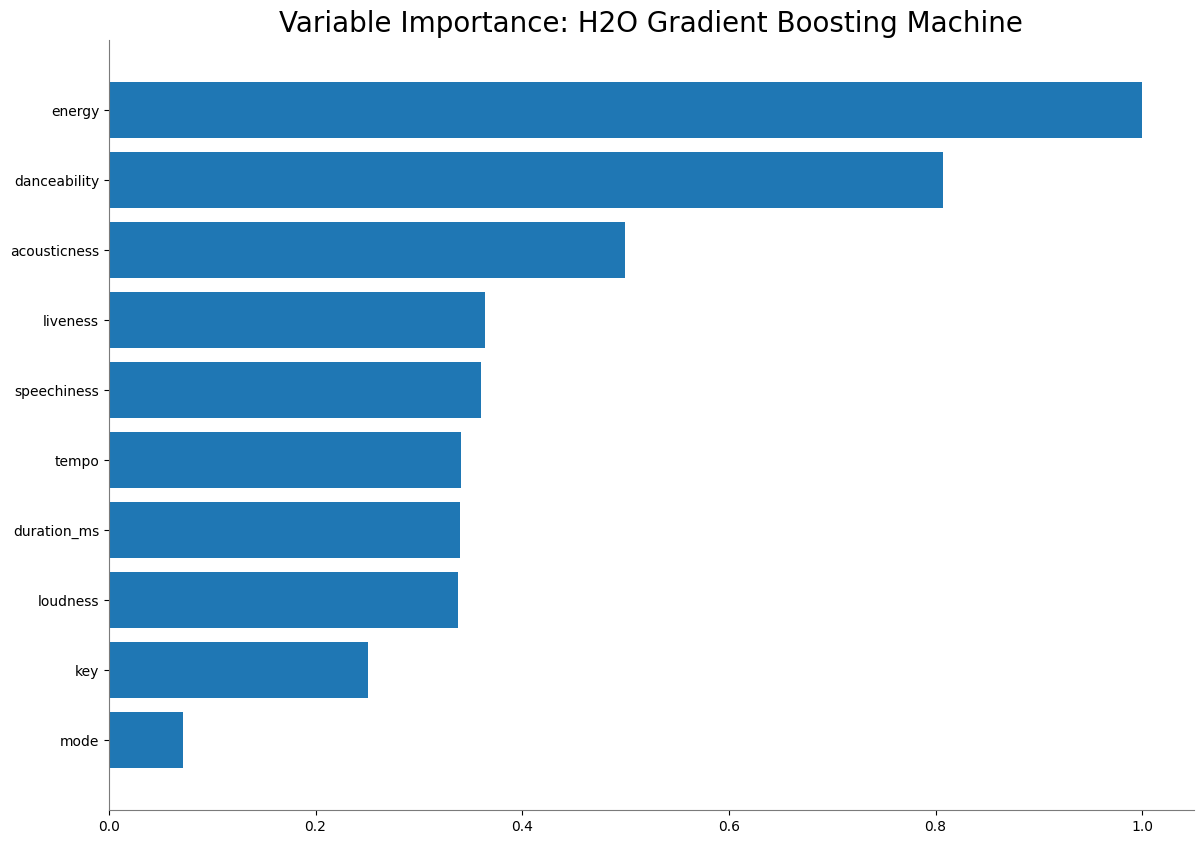

<Figure size 640x480 with 0 Axes>

In [51]:
gbm.varimp_plot()

Prediction

In [52]:
pred =gbm.predict(test)
pred = pred.cbind(test['valence'])
pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,valence
0.450405,0.447
0.632237,0.632
0.50082,0.501
0.728808,0.732
0.612936,0.613
0.511239,0.512
0.539132,0.536
0.374023,0.374
0.460426,0.458
0.558024,0.584


### Download Leader Model

In [ ]:
aml.leader.download_mojo(path = "./")

### Shutdown Cluster

In [ ]:
h2o.cluster().shutdown()